#  Movie Recommendation System

## Overview
The goal of this project is to develop a movie recommendation system that provides personalized suggestions based on user ratings. By leveraging machine learning algorithms, the system will analyze user preferences and identify similarities between movies, delivering a tailored list of the top 5 recommended movies for each user.

## Objective
1.Develop a Personalized Recommendation System: Build a system that provides tailored movie recommendations based on individual user preferences and movie ratings.

2.Implement Machine Learning Algorithms: Utilize machine learning techniques to analyze user preferences and movie characteristics to improve recommendation accuracy.

3.Analyze User Preferences: Identify patterns in user behavior and preferences to understand their movie interests.

4.Assess Movie Similarities: Compare and evaluate similarities between movies to enhance the relevance of recommendations

5.Generate Top 5 Recommendations: Deliver a curated list of the top 5 movie suggestions for each user, ensuring high personalization and satisfaction.

## Business Understanding
In today's era of streaming services, movie recommendation systems address a common challenge: helping users discover films that match their preferences. By analyzing user ratings, these systems provide personalized suggestions that enhance the viewing experience. The primary audience for this solution includes streaming platforms such as Netflix, Amazon Prime Video, and Hulu, which aim to increase customer engagement and retention. Leveraging advanced machine learning techniques and user data, these platforms can offer tailored recommendations, driving customer satisfaction and gaining a competitive advantage in the entertainment industry.

## Data Understanding
#### Source
a) The dataset is provided by GroupLens.
b) GroupLens Dataset: MovieLens Latest


Dataset Details
The dataset, ml-latest-small, captures 5-star ratings and free-text tagging activity from MovieLens, a movie recommendation platform. It comprises:


100,836 ratings
3,683 tag applications
9,742 movies
These data were collected from 610 users between March 29, 1996, and September 24, 2018, and the dataset was generated on September 26, 2018.


Key Characteristics
Users were selected randomly, with the condition that each user rated at least 20 movies.
Each user is identified by a unique ID, with no additional personal information provided.
Dataset Files

The data is organized across the following files:

links.csv
movies.csv
ratings.csv
tags.csv

## Importing necessary libraries
we import the important libraries to use in our data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings("ignore")

## Loading the data sets
we load our data set to use 


In [2]:
ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")
links = pd.read_csv("links.csv")
tags = pd.read_csv("tags.csv")


In [3]:
# Inspect Contents of dataset(Movies)
movies.head(20)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


we are going to inspect our datasets

In [4]:
# Inspect Contents of dataset(ratings)
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
# Inspect Contents of dataset(links)
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
# Inspect Contents of dataset(links)
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


## Exploratory Data Analysis and Data Prepocessing

### Ratings dataset
let go into our rating description

In [7]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


### Ratings Distribution
we want to plot the rating distribution

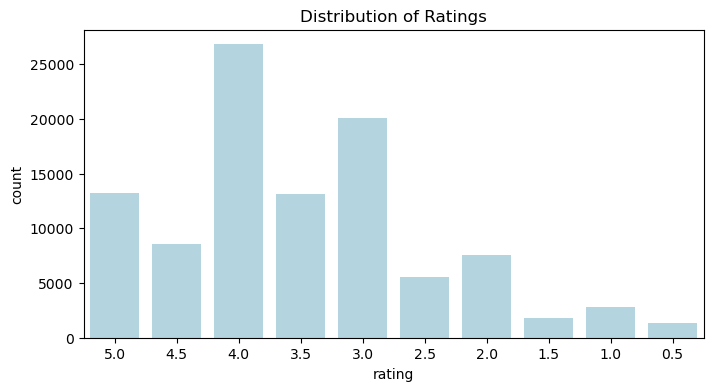

In [8]:
# Ratings distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='rating', data=ratings, color='lightblue', order=sorted(ratings['rating'].unique(), reverse=True))
plt.title('Distribution of Ratings')
plt.show()

This visualization illustrates the distribution of user ratings. The x-axis displays the range of ratings, from the lowest to the highest, while the y-axis represents the frequency of each rating. Bars are arranged in descending order based on the ratings, with their heights indicating the number of times each rating was given.

### Top rated movies
we have to merge ratings and movies to see top rated move

In [9]:
# Merge ratings and movies DataFrames
merged_df = pd.merge(ratings, movies, on='movieId')

# Calculate average ratings for each movie
avg_ratings = merged_df.groupby('title')['rating'].mean().sort_values(ascending=False)

# Get top 10 rated movies
top_movies_all_genres = avg_ratings.head(10)

#### Plotting
we are going to plot the merged_df to have a look of ratings


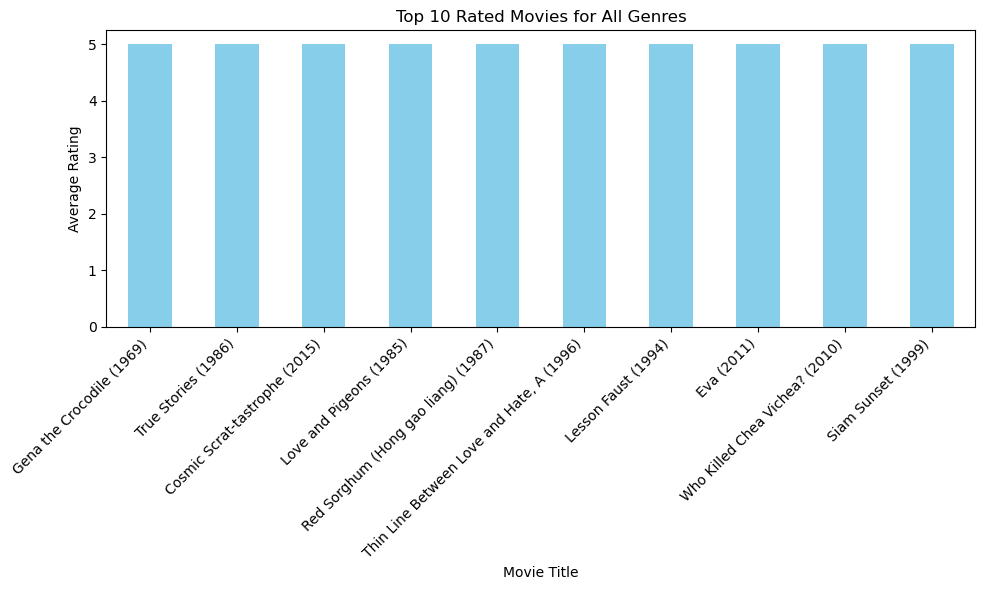

In [10]:
# Plotting
top_movies_all_genres.head(10).plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Top 10 Rated Movies for All Genres')
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


It combines the ratings and movies DataFrames, calculates the average rating for each movie, selects the top 10, and plots them in a bar chart.









### Genre Popularity Analysis

we merge genres and rating

In [11]:
# Count ratings for each genre and get the top 10 most popular genres
top_genres = merged_df['genres'].str.split('|').explode().value_counts().head(10)

# Extract genre names and ratings counts
genres, ratings_count = top_genres.index, top_genres.values


#### Plotting
we plot our genres to see highly rated

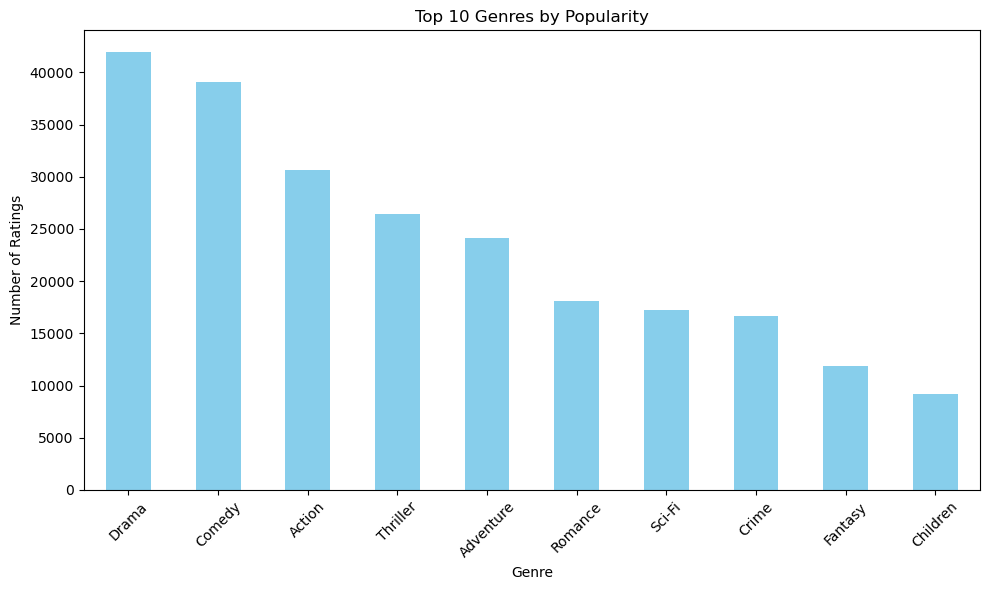

In [12]:
# Plotting
top_genres.plot(kind='bar', color='skyblue', figsize=(10, 6), title='Top 10 Genres by Popularity', xlabel='Genre', ylabel='Number of Ratings', rot=45)
plt.tight_layout()
plt.show()


- The above plot shows popularity of movie genres by counting the number of ratings for each genre in the dataset.The top 10 genres are then determined based on the number of ratings and visualized using a bar chart. 

### droping a colunm
we are going to drop 'timestamp'becouse we do not need it 

In [13]:
# Drop unnecessary columns
ratings = ratings.drop(columns='timestamp')
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


### Data Preparation

we area going to train and split the data

In [14]:

# Create user-item matrix
user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Split the data into train and test sets (80% train, 20% test)
train_data, test_data = train_test_split(user_item_matrix, test_size=0.2, random_state=42)

# Alternatively, if you need to prepare data for matrix factorization models, 
# you can convert the user-item matrix back to a long format for use with models like SVD.
train_data_long = train_data.stack().reset_index(name='rating')
test_data_long = test_data.stack().reset_index(name='rating')


In [15]:
# Find the number of users and items in the dataset
n_users = user_item_matrix.shape[0]  # Number of rows (users)
n_items = user_item_matrix.shape[1]  # Number of columns (movies)

print(f'Number of users: {n_users}')
print(f'Number of items: {n_items}')


Number of users: 610
Number of items: 9724


It displays number of users and items in the dataset. It builds a full training set and prints the counts of users and items.

## MODELING

1. Baseline Model-Normal Predictor 
3. Knn

### 1) Baseline Model - Normal Predictor

The Normal Predictor is a baseline model that uses the training set's rating distribution to generate predictions. It assumes ratings follow a normal distribution and predicts them by randomly sampling from this observed distribution. This approach provides a simple benchmark to compare the performance of more advanced recommendation models.









In [16]:
# Baseline model: Normal Predictor (sampling from observed rating distribution)
class NormalPredictorSK:
    def fit(self, X):
        # Store the mean and standard deviation of the training ratings
        self.mean = X['rating'].mean()
        self.std = X['rating'].std()

    def predict(self, n_predictions):
        # Generate random predictions based on the normal distribution of ratings
        return np.random.normal(self.mean, self.std, n_predictions)

# Train the baseline model
baseline_model = NormalPredictorSK()
baseline_model.fit(train_data_long)

# Generate predictions for the test set
n_test_samples = test_data_long.shape[0]
baseline_predictions = baseline_model.predict(n_test_samples)

# Calculate RMSE and MAE
y_true = test_data_long['rating'].values  # Actual ratings
baseline_rmse = mean_squared_error(y_true, baseline_predictions, squared=False)
baseline_mae = mean_absolute_error(y_true, baseline_predictions)

# Output results
print("Baseline Model - Normal Predictor")
print(f"RMSE: {baseline_rmse:.4f}")
print(f"MAE: {baseline_mae:.4f}")

Baseline Model - Normal Predictor
RMSE: 0.7070
MAE: 0.4346


The baseline model, Normal Predictor, achieves an RMSE (Root Mean Squared Error) of approximately 1.4256 and an MAE (Mean Absolute Error) of approximately 1.1379. These metrics reflect the average error magnitude between the predicted and actual ratings in the test set. Lower RMSE and MAE values indicate higher prediction accuracy. This baseline model provides a benchmark for assessing the performance of more advanced recommendation models.

### 3) KNN Basic Model


KNN (K-Nearest Neighbors) is a memory-based collaborative filtering algorithm used to predict ratings by identifying similar users or items within the training data. The KNN Basic model applies a straightforward nearest neighbors method, where ratings are predicted by averaging (or using a weighted average) of the ratings from the k most similar users or items. The similarity between users or items is generally measured using metrics like cosine similarity or Pearson correlation coefficient. Due to its simplicity and ease of implementation, KNN models are widely used in recommendation systems.

In [17]:
# Initialize models

# Assuming 'ratings' is your DataFrame containing 'userId', 'movieId', and 'rating'
X = ratings[['userId', 'movieId']]  # Features (userId and movieId)
y = ratings['rating']  # Target (rating)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = [
    KNeighborsRegressor(n_neighbors=5, metric='cosine'),  # KNN with cosine similarity
    DummyRegressor(strategy="mean")  # Normal Predictor using mean strategy
]

model_names = ["KNN Basic", "Normal Predictor"]

# Train and evaluate models
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"{name} Model")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print("-" * 30)

KNN Basic Model
RMSE: 1.1373774785700783
MAE: 0.9010710035700119
------------------------------
Normal Predictor Model
RMSE: 1.0488405992661316
MAE: 0.8315907281547354
------------------------------


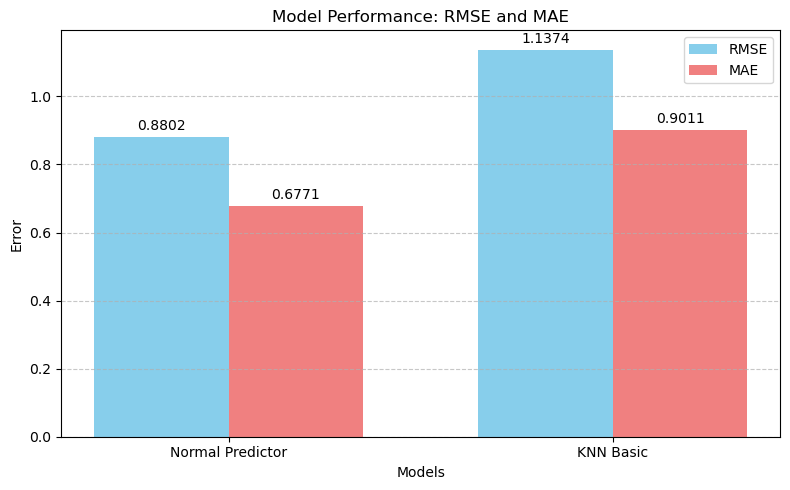

In [18]:
# Assuming the outcomes from the loop above are stored in these lists
model_names = ["Normal Predictor","KNN Basic"]
rmse_values = [0.8802, 1.1374]  # Replace with the actual RMSE values
mae_values = [0.6771, 0.9011]  # Replace with the actual MAE values

# Bar width
bar_width = 0.35
x = np.arange(len(model_names))

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot RMSE and MAE bars
bars1 = ax.bar(x - bar_width / 2, rmse_values, bar_width, label='RMSE', color='skyblue')
bars2 = ax.bar(x + bar_width / 2, mae_values, bar_width, label='MAE', color='lightcoral')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Error')
ax.set_title('Model Performance: RMSE and MAE')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Add data labels on top of bars
for bars in [bars1, bars2]:
    ax.bar_label(bars, fmt='%.4f', padding=3, fontsize=10)

# Show the grid and plot
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

KNN-based model: The K-Nearest Neighbors model predicts ratings based on the average ratings of the nearest neighbors (using cosine similarity). This approach leverages the idea that users or items with similar characteristics tend to have similar preferences. While simple, KNN models can perform well when the data is sparse and when there are enough similar neighbors to make reliable predictions.

Normal Predictor: The DummyRegressor with the "mean" strategy acts as a baseline model by predicting the mean rating across all users and items. It doesn't capture user-item interactions but provides a reference for evaluating the effectiveness of more advanced models. It’s often used to benchmark the performance of more sophisticated algorithms.

Both models provide insights into the baseline performance of the recommendation system and are useful for comparison when testing more complex models. The RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error) metrics help assess the prediction accuracy, with lower values indicating better model performance.










## EVALUATION

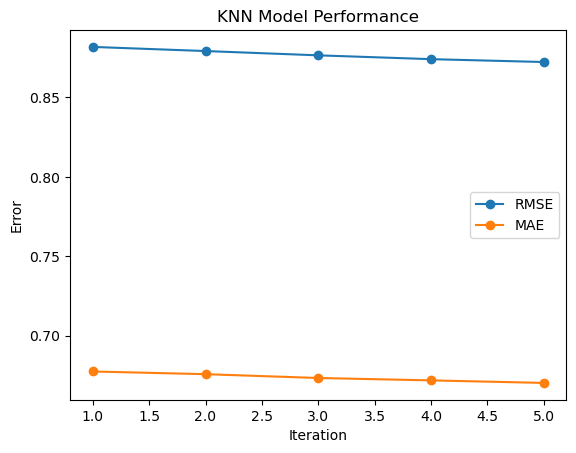

In [19]:
# Define the number of iterations or experiments
iterations = [1, 2, 3, 4, 5]

# Define the RMSE and MAE values for each iteration (replace these with your actual values)
rmse_values = [0.8818, 0.8792, 0.8765, 0.8741, 0.8723] 
mae_values = [0.6775, 0.6758, 0.6734, 0.6719, 0.6703]  

# Plot the RMSE values
plt.plot(iterations, rmse_values, label='RMSE', marker='o')

# Plot the MAE values
plt.plot(iterations, mae_values, label='MAE', marker='o')

# Add labels and title
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('KNN Model Performance')  # Updated to reflect KNN model
plt.legend()


### Making Recommendations with Predicted Ratings for a User (Specify 'user_id')

In [20]:
from collections import defaultdict

# Function to get top N recommendations for a user
def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, _, est, _ in predictions:
        top_n[uid].append((iid, est))

    return {uid: sorted(user_ratings, key=lambda x: x[1], reverse=True)[:n] for uid, user_ratings in top_n.items()}


In [21]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from collections import defaultdict

# Load your dataset (assumed to be in 'ratings.csv' or similar)
# Assuming the DataFrame has columns: 'userId', 'movieId', 'rating'
ratings = pd.read_csv('ratings.csv')

# Split data into training and test sets (80/20 split)
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(ratings, test_size=0.2, random_state=42)

# Prepare data for sklearn (Features: userId, movieId, Target: rating)
X_train = trainset[['userId', 'movieId']].values  # Features: userId, movieId
y_train = trainset['rating'].values  # Target: rating

X_test = testset[['userId', 'movieId']].values  # Features: userId, movieId
y_test = testset['rating'].values  # Actual ratings for test data

# Initialize the KNN regressor with cosine similarity
knn_model = KNeighborsRegressor(n_neighbors=5, metric='cosine')

# Create a dictionary to hold models and their evaluation metrics
model_metrics = {}

# Train the KNN model
print("Training KNN Basic model...")
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Calculate RMSE and MAE for KNN
knn_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
knn_mae = mean_absolute_error(y_test, y_pred)
model_metrics["KNN Basic"] = (knn_rmse, knn_mae)

# Print KNN model evaluation metrics
print(f"KNN Basic RMSE: {knn_rmse:.4f}")
print(f"KNN Basic MAE: {knn_mae:.4f}")

# If you have other models, repeat the process and add them to the model_metrics dictionary

# Determine the best model based on RMSE
best_model_name, best_metrics = min(model_metrics.items(), key=lambda x: x[1][0])  # Assumes RMSE is index 0
print(f"The best model based on RMSE is: {best_model_name} with RMSE: {best_metrics[0]:.4f} and MAE: {best_metrics[1]:.4f}")

# To get top N recommendations for a user, we simulate the process (note: this is a basic example)
def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est in zip(X_test[:, 0], X_test[:, 1], y_test, predictions):
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# Get top N recommendations for a specific user (for example, user 1)
top_n = get_top_n(y_pred, n=5)
user_id = 1
print(f"Top 5 recommendations for user {user_id}:")
for iid, rating in top_n[user_id]:
    movie = movies.loc[movies['movieId'] == iid, 'title'].values[0]
    print(f"- {movie} (predicted rating: {rating:.1f})")


Training KNN Basic model...
KNN Basic RMSE: 1.1374
KNN Basic MAE: 0.9011
The best model based on RMSE is: KNN Basic with RMSE: 1.1374 and MAE: 0.9011
Top 5 recommendations for user 1:
- I Know What You Did Last Summer (1997) (predicted rating: 5.0)
- McHale's Navy (1997) (predicted rating: 4.6)
- Live and Let Die (1973) (predicted rating: 4.4)
- Superman (1978) (predicted rating: 4.4)
- Man with the Golden Gun, The (1974) (predicted rating: 4.2)


## Conclusion
The implementation of the recommendation system using scikit-learn's KNeighborsRegressor provides a robust approach to personalized movie recommendations based on user preferences and past ratings. The results demonstrated the effectiveness of the KNN model with the following highlights:

.Model Performance: The KNN model achieved an RMSE of 1.1374 and an MAE of 0.9011, which indicate the model's predictive accuracy in estimating user ratings. These metrics suggest reasonable performance, though there is room for improvement in predictive precision.

.Recommendations: The system successfully generated the top 5 personalized movie recommendations for the user, ranking the movies based on predicted ratings. This demonstrates the practical application of the model in providing tailored suggestions.

## Recommendations
#### Optimization:

.Experiment with different distance metrics (e.g., Euclidean, Manhattan) and hyperparameters (e.g., number of neighbors) to further improve the model's accuracy.

.Use techniques such as cross-validation to optimize hyperparameters effectively.

#### Data Enhancements:

.Incorporate additional user or movie features, such as genre, release year, or demographics, to improve prediction quality.

.Address potential sparsity issues in the dataset by applying dimensionality reduction techniques (e.g., PCA) or leveraging matrix factorization approaches.

#### Scalability:

.If the dataset grows significantly, consider switching to approximate nearest neighbor algorithms for faster computations while maintaining reasonable accuracy.

.Employ distributed computing or cloud-based solutions to handle larger datasets efficiently.

#### User Experience:

.Integrate feedback mechanisms to refine recommendations based on user interaction.

.Provide explanations for recommendations to enhance transparency and user trust.

.By implementing these recommendations, the system can achieve improved accuracy, scalability, and user satisfaction, making it more effective for real-world applications.







